In [1]:
import sys
sys.path.append('..')
from dezero import *

In [2]:
train_set = datasets.SinCurve(train=True)
dataloader = dataloaders.SeqDataLoader(train_set, batch_size=3)
x, t = next(dataloader)
print(x)
print('-' * 20)
print(t)

[[-0.04416612]
 [ 0.84776471]
 [-0.83577495]]
--------------------
[[-0.01179375]
 [ 0.90403958]
 [-0.85228149]]


In [3]:
import numpy as np

In [4]:
max_epoch = 100
batch_size = 30
hidden_size = 100
bptt_length = 30
train_set = datasets.SinCurve(train=True)
dataloader = dataloaders.SeqDataLoader(train_set, batch_size=batch_size)
seqlen = len(train_set)

In [5]:
class BetterRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.LSTM(hidden_size)
        self.fc = L.Linear(out_size)
        
    def reset_state(self):
        self.rnn.reset_state()
        
    def forward(self, x):
        y = self.rnn(x)
        return self.fc(y)

In [6]:
model = BetterRNN(hidden_size, 1)
optimizer = optimizers.Adam().setup(model)

In [7]:
for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0
    
    for x, t in dataloader:
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1
        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
            
    avg_loss = float(loss.data) / count
    print('epoch %d | loss %f' % (epoch + 1, avg_loss))

epoch 1 | loss 0.245850
epoch 2 | loss 0.176721
epoch 3 | loss 0.121830
epoch 4 | loss 0.080704
epoch 5 | loss 0.052650
epoch 6 | loss 0.036523
epoch 7 | loss 0.030449
epoch 8 | loss 0.031703
epoch 9 | loss 0.036961
epoch 10 | loss 0.042971
epoch 11 | loss 0.047308
epoch 12 | loss 0.048759
epoch 13 | loss 0.047213
epoch 14 | loss 0.043264
epoch 15 | loss 0.037828
epoch 16 | loss 0.031855
epoch 17 | loss 0.026163
epoch 18 | loss 0.021349
epoch 19 | loss 0.017769
epoch 20 | loss 0.015543
epoch 21 | loss 0.014578
epoch 22 | loss 0.014615
epoch 23 | loss 0.015284
epoch 24 | loss 0.016172
epoch 25 | loss 0.016917
epoch 26 | loss 0.017272
epoch 27 | loss 0.017137
epoch 28 | loss 0.016547
epoch 29 | loss 0.015623
epoch 30 | loss 0.014530
epoch 31 | loss 0.013426
epoch 32 | loss 0.012444
epoch 33 | loss 0.011675
epoch 34 | loss 0.011162
epoch 35 | loss 0.010903
epoch 36 | loss 0.010860
epoch 37 | loss 0.010965
epoch 38 | loss 0.011136
epoch 39 | loss 0.011293
epoch 40 | loss 0.011370
epoch 41 

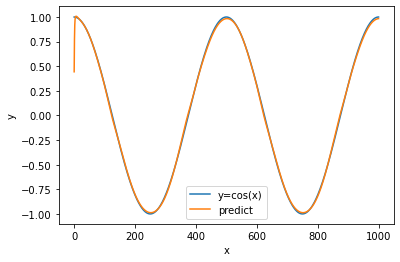

In [8]:
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

import dezero
import matplotlib.pyplot as plt

with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))
        
plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()